<a href="https://colab.research.google.com/github/AK6263/E-Commerce-System/blob/main/19MS051_MA4106_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The given data set contains the Boston house-price data of Harrison, D. and Rubinfeld, D.L. It consists of thirteen input variables and one output variable.
#### **Input variables (in order)**
* **CRIM**: per capita crime rate by town
* **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town
* **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX**: nitric oxides concentration (parts per 10 million) 
* **RM**: average number of rooms per dwelling
* **AGE**: proportion of owner-occupied units built prior to 1940
* **DIS**: weighted distances to five Boston employment centres
* **RAD**: index of accessibility to radial highways
* **TAX**: full-value property-tax rate per 10,000 dollars 
* **PTRATIO**: pupil-teacher ratio by town
* **B**: the result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT**: % lower status of the population



#### **Output variable**

* **MEDV**: median value of owner-occupied homes in 1000's of dollars

## Data

From the compact structure of the Boston house-price data, we observe that the data contains 506 observations (rows) of 14 variables (columns).


##OLS Regression
We perform OLS regression considering the logarithm of MEDV as the response variable


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge,RidgeCV

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
logMedv = []
for i in boston_dataset.target:
  logMedv.append(math.log(i))
boston_values = pd.DataFrame({'log(Medv)':logMedv})
X_train, X_test, Y_train, Y_test = train_test_split(boston, boston_values, test_size = 0.2, random_state=20)
linearModel = LinearRegression()
linearModel.fit(X_train, Y_train)
y_train_predict = linearModel.predict(X_train)
mse_1 = mean_squared_error(Y_train, y_train_predict)
r2_1 = r2_score(Y_train, y_train_predict)
print('MSE for training set is %.5f'%(mse_1))
print('R2 score for training set is %.5f'%(r2_1))
print("\n")
y_test_predict = linearModel.predict(X_test)
mse_2 = mean_squared_error(Y_test, y_test_predict)
r2_2 = r2_score(Y_test, y_test_predict)
print('MSE for testing set is %.5f'%(mse_2))
print('R2 score for testing set is %.5f'%(r2_2))
print("\n")
coefficients_ols=linearModel.coef_
print('Coefficients:')
for i in range(0, coefficients_ols.size):
  print(list(boston)[i] + ': %.10f' %coefficients_ols.item(i))

MSE for training set is 0.03572
R2 score for training set is 0.79453


MSE for testing set is 0.03400
R2 score for testing set is 0.75312


Coefficients:
CRIM: -0.0101191566
ZN: 0.0010784373
INDUS: 0.0029621968
CHAS: 0.1020768993
NOX: -0.9194517358
RM: 0.0843003686
AGE: 0.0009046856
DIS: -0.0456251654
RAD: 0.0136560921
TAX: -0.0006314978
PTRATIO: -0.0354678659
B: 0.0003249817
LSTAT: -0.0301840653


## Ridge Regression
We perform ridge regression considering the logarithm of MEDV as the response variable.\
We predict ridge parameter from trace plot, we choose alpha value from plot where graph of all coefficients is stabilized. In our case, near α = 4.005 sign of one of the coefficients changes. Hence, we choose α = 4.005 as our ridge parameter for ridge regression.

In [ ]:
model = Ridge(alpha=1.0, normalize=True).fit(boston,boston_values)
pred_y = model.predict(boston)
score = model.score(boston,boston_values)
mse = mean_squared_error(boston_values, pred_y) 
print('MSE for ridge regression is %.5f'%(mse))
print('R2 score for ridge regression is %.5f'%(score))
print('\n')
coefficients_ridge=model.coef_
print('Coefficients:')
for i in range(0, coefficients_ridge.size):
  print(list(boston)[i] + ': %.10f' %coefficients_ridge.item(i))

MSE for ridge regression is 0.05171
R2 score for ridge regression is 0.68989


Coefficients:
CRIM: -0.0051966627
ZN: 0.0004668618
INDUS: -0.0031655268
CHAS: 0.0930261144
NOX: -0.2126956204
RM: 0.0998953790
AGE: -0.0006036212
DIS: -0.0062609292
RAD: -0.0010764135
TAX: -0.0001575014
PTRATIO: -0.0207343941
B: 0.0003295938
LSTAT: -0.0127193755


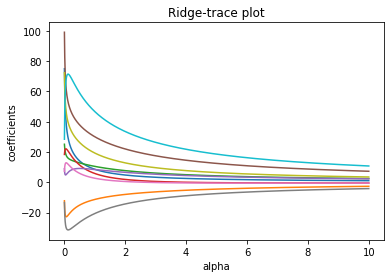

In [ ]:
alphas = np.arange(0.001, 10, 0.001)
coefs=[]
X, y, w = make_regression(
    n_samples=10, n_features=10, coef=True, random_state=1, bias=3.5
)
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(X,y) 
 coefs.append(model.coef_)

plt.plot(alphas,coefs)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge-trace plot')
#plt.savefig('ridge-trace.png')
plt.show()

## LOOCV technique
Here, we determine ridge parameter using leave-one out cross validation technique.\
We get α = 0.027, MSE for this value of alpha is 0.03391 and R^2 score for this value of alpha is 0.75376
And for α = 4.005, MSE is 0.05171 and R^2 score is 0.68989.\
We can see that MSE for α = 0.027 is less than that for α = 4.005. Thus, we choose α =0.027 as our ridge parameter

Ridge parameter from cross validation is 0.02700


MSE for RidgeCV is 0.03391
R2 score for RidgeCV is 0.75376




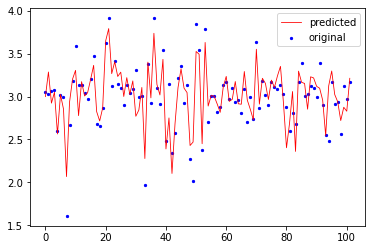

In [ ]:
alphas=np.arange(0.001,10,0.001)
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(X_train,Y_train)
print("Ridge parameter from cross validation is %.5f"%(ridge_mod.alpha_))
print("\n")

ypred = ridge_mod.predict(X_test)
score = ridge_mod.score(X_test,Y_test)
mse = mean_squared_error(Y_test,ypred)
print("MSE for RidgeCV is %.5f"%(mse))
print("R2 score for RidgeCV is %.5f"%(score))
print("\n")

x_ax = range(len(X_test))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## OLS vs Ridge regression
We compare the coefficients and predicted errors. \
 
### Coefficients

From the coefficients table, we observe that the absolute values of the coefficients of ridge regression are smaller than the absolute values of the coefficients of OLS regression. That is, we observe a shrink in the absolute values of the coefficients, supporting the theory - as the parameter value increases, the coefficients shrink to zero.

In [ ]:
model = Ridge(alpha=0.027, normalize=True).fit(boston,boston_values)
coefficients_ridge=model.coef_

df = pd.DataFrame ({'Coefficient': list(boston), 
                    'OLS': coefficients_ols.flatten(), 
                    'Ridge': coefficients_ridge.flatten()})
df.index=df.index+1
print('\n\nEstimates of parameters for OLS and Ridge regression\n')
print(df)



Estimates of parameters for OLS and Ridge regression

   Coefficient       OLS     Ridge
1         CRIM -0.010119 -0.009628
2           ZN  0.001078  0.000901
3        INDUS  0.002962  0.000710
4         CHAS  0.102077  0.107939
5          NOX -0.919452 -0.661966
6           RM  0.084300  0.101247
7          AGE  0.000905  0.000013
8          DIS -0.045625 -0.043811
9          RAD  0.013656  0.010133
10         TAX -0.000631 -0.000437
11     PTRATIO -0.035468 -0.036079
12           B  0.000325  0.000418
13       LSTAT -0.030184 -0.027420


In [ ]:
pred_y = model.predict(boston)
score = model.score(boston,boston_values)
mse = mean_squared_error(boston_values, pred_y)

pred1_y = linearModel.predict(boston)
score_1=linearModel.score(boston,boston_values)
mse_1=mean_squared_error(boston_values,pred1_y)

print('\nMSE for OLS regression is %.5f'%(mse_1))
print('MSE for ridge regression is %.5f\n'%(mse))

print('R2 score OLS regression is %.5f'%(score_1))
print('R2 score for ridge regression is %.5f'%(score))


MSE for OLS regression is 0.03537
MSE for ridge regression is 0.03535

R2 score OLS regression is 0.78786
R2 score for ridge regression is 0.78798
